In [2]:
from astropy.io import fits
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sunpy.cm
import estimate_likelihoods

In [3]:
ar_mask = fits.open('/data/spoca_masks/AR_maps/20130423_000000.ARMap.fits')[1].data > 0
ch_mask = fits.open('/data/spoca_masks/CH_maps_min3days/20130423_000007.CHMap.fits')[1].data > 0
spoca_mask = np.ones(ar_mask.shape, dtype=np.int8)
spoca_mask[ar_mask] = 0
spoca_mask[ch_mask] = 2

In [8]:
ar_mask, qs_mask, ch_mask = estimate_likelihoods.load_masks(*['masks/limbcorrected_00000928.xcf.{}.png'.format(cls) for cls in ['ar', 'qs', 'ch']])
my_mask = np.ones(ar_mask.shape, dtype=np.int8)
my_mask[ar_mask] = 0
my_mask[ch_mask] = 2

In [5]:
hdulist = fits.open('/data/originals_4y_1d/AIA20130423_0000_0193.fits')
hdulist.verify('fix')
original = hdulist[1].data

 [astropy.io.fits.verify]



<matplotlib.contour.QuadContourSet instance at 0x7ff281d64b00>

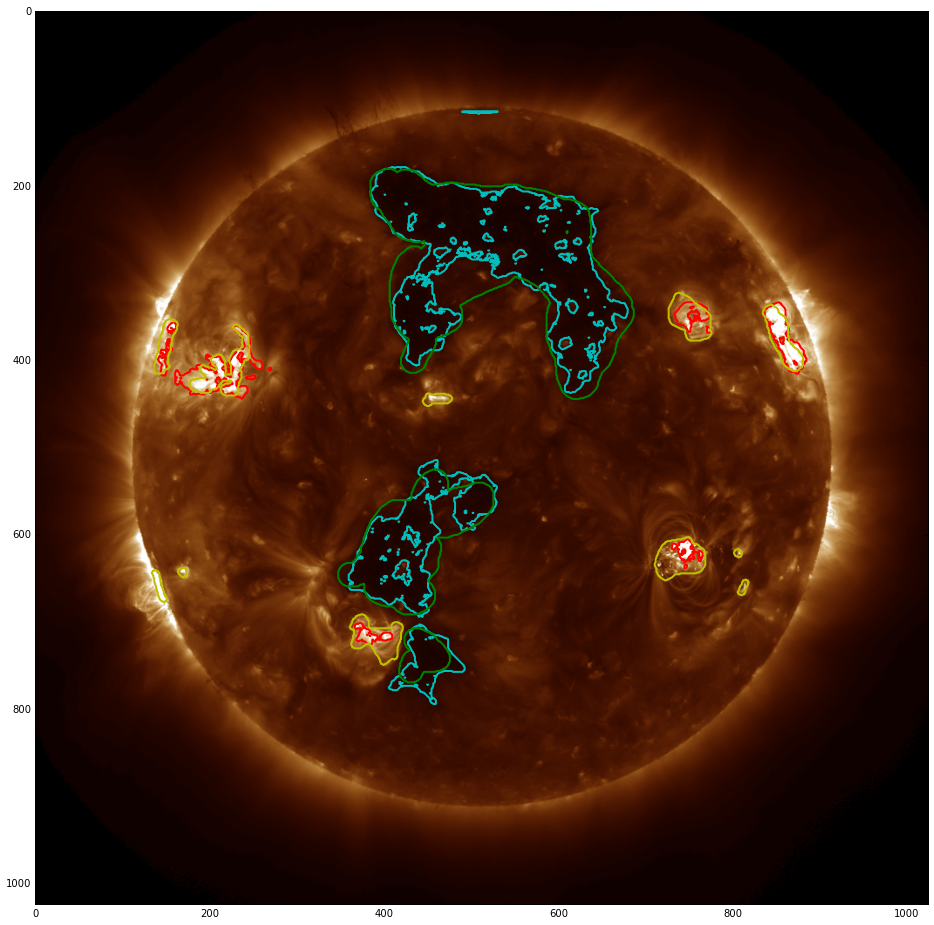

In [10]:
fig = plt.gcf()
fig.set_size_inches((16,16))
plt.imshow(original, cmap=sunpy.cm.get_cmap('sdoaia193'), vmax=3000)
plt.contour(spoca_mask[::4,::4] == 0, [0.5], colors='r', linewidths=2)
plt.contour(spoca_mask[::4,::4] == 2, [0.5], colors='c', linewidths=2)
plt.contour(my_mask == 0, [0.5], colors='y', linewidths=2)
plt.contour(my_mask == 2, [0.5], colors='g', linewidths=2)